# **Solución de Problemas**

### **Base de datos:** Calificaciones.csv

1. Importa los datos del archivo “Calificaciones.csv” a tu ambiente de trabajo.. Imprime en consol 
el tipo de dato de cada variable del data fram.

In [323]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [299]:
#Leer CSV
df = pd.read_csv('Calificaciones.csv')
#Tipos de datos
print('Tipos de dato en el dataframe:\n', df.dtypes)

Tipos de dato en el dataframe:
 Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


Existen dos tipos de datos dentro del dataframe: enteros (numéricos), y objetos (cualitativos)

2. Transforma todas las variables categóricas, de forma que los nuevos datos sean útiles 
para generar un modelo de regresión lineal múltiple. Presta especial atención a variable 
que, aunque parecen cuantitativas (contienen números), realmente son cualitativas (l s
números representan una clase). Imprime las primeras 5 observaciones de la base de
datos modificada, demostrando que las variables cualitativas desaparecieron y fu ron
reemplazadas por variables adecuadas.

In [302]:
#Internet solo hay dos opciones: 'si' y 'no'
df['Internet_num'] = df['Internet'].astype('category').cat.codes
df = df.drop('Internet', axis=1)
#Escuela hay dos opciones: 'GP' y 'MS'
df['Escuela_num'] = df['Escuela'].astype('category').cat.codes
df = df.drop('Escuela', axis=1)
#Sexo hay dos opciones: 'F' y 'M'
df['Sexo_num'] = df['Sexo'].astype('category').cat.codes
df = df.drop('Sexo', axis=1)
#Hay varias opciones para HorasDeEstudio, hay que hace varias variables con '0' y '1' para cada posible opción
dummyHorasDeEstudio = pd.get_dummies(df.HorasDeEstudio, drop_first=True)
df = pd.concat([df, dummyHorasDeEstudio], axis=1)
df = df.rename(columns={2: 'EstudioBajo', 3: 'EstudioMedio', 4: 'EstudioAlto'})
df = df.drop('HorasDeEstudio', axis=1)
df['EstudioBajo'] = df['EstudioBajo'].astype('category').cat.codes
df['EstudioMedio'] = df['EstudioMedio'].astype('category').cat.codes
df['EstudioAlto'] = df['EstudioAlto'].astype('category').cat.codes
df.head(5)

,Edad,Reprobadas,Faltas,G1,G2,G3,Internet_num,Escuela_num,Sexo_num,EstudioBajo,EstudioMedio,EstudioAlto
0,18,0,6,5,6,6,0,0,0,1,0,0
1,17,0,4,5,5,6,1,0,0,1,0,0
2,15,3,10,7,8,10,1,0,0,1,0,0
3,15,0,2,15,14,15,1,0,0,0,1,0
4,16,0,4,6,10,10,0,0,0,1,0,0


3. Identifica valores atípicos para la variable “Faltas”, utilizando el método de Tukey con k=3. 
Imprime en consola todas las observaciones que se consideren atípicas, y tras revisar la 
características de dichas observaciones, agrega una línea de texto que describa q é
planeas hacer con dichos valores y por qué. Realiza la acción descrita en caso de  er
necesaio.

In [304]:
# Outliers para price
q1 = df.Faltas.quantile(0.25)
q3 = df.Faltas.quantile(0.75)
# Rango intercuartil
iqr = q3 - q1
# Límite inferior
li = q1 - (3 * iqr)
# Límite superior
ls = q3 + (3 * iqr)
# Observaciones fuera de cualquiera de los dos límites por k = 3
out = np.where((df.Faltas <= li) | (df.Faltas >= ls))[0]
print(df.iloc[out,:])

     Edad  Reprobadas  Faltas  G1  G2  G3  Internet_num  Escuela_num  \
74     16           0      54  11  12  11             1            0   
183    17           0      56   9   9   8             1            0   
276    18           0      75  10   9   9             1            0   
307    19           1      38   8   9   8             1            0   
315    19           1      40  13  11  11             1            0   

     Sexo_num  EstudioBajo  EstudioMedio  EstudioAlto  
74          0            1             0            0  
183         0            1             0            0  
276         0            1             0            0  
307         1            0             0            0  
315         0            0             1            0  


In [305]:
print('Promedio de faltas:', df['Faltas'].mean())
print('Valor mínimo de faltas: ', df['Faltas'].min())
print('Valor máximo de faltas: ', df['Faltas'].max())
print('Valor que más se repite: ', df['Faltas'].mode()[0])
print('Si el promedio es aproximadamente 5 y el mínimo es 0, esto nos indica que el número máximo (75), y los valores detectados en el paso anterior son muy probablemente outliers. Incluso si el alumno tiene calificaciones parciales relativamente malas, estos valores son muy grandes y están muy alejados de la media. Pero independientemente de si estos valores son outliers o no, podrían hacer ruido al modelo dado lo alejados que están de todos los demás datos, por lo tanto considero conveniente eliminarlos para minimizar el ruido al modelo.')

Promedio de faltas: 5.708860759493671
Valor mínimo de faltas:  0
Valor máximo de faltas:  75
Valor que más se repite:  0
Si el promedio es aproximadamente 5 y el mínimo es 0, esto nos indica que el número máximo (75), y los valores detectados en el paso anterior son muy probablemente outliers. Incluso si el alumno tiene calificaciones parciales relativamente malas, estos valores son muy grandes y están muy alejados de la media. Pero independientemente de si estos valores son outliers o no, podrían hacer ruido al modelo dado lo alejados que están de todos los demás datos, por lo tanto considero conveniente eliminarlos para minimizar el ruido al modelo.


In [306]:
df.drop(out, axis=0, inplace=True)
# Outliers para price
q1 = df.Faltas.quantile(0.25)
q3 = df.Faltas.quantile(0.75)
# Rango intercuartil
iqr = q3 - q1
# Límite inferior
li = q1 - (3 * iqr)
# Límite superior
ls = q3 + (3 * iqr)
# Observaciones fuera de cualquiera de los dos límites por k = 3
out = np.where((df.Faltas <= li) | (df.Faltas >= ls))[0]
print(df.iloc[out,:])

Empty DataFrame
Columns: [Edad, Reprobadas, Faltas, G1, G2, G3, Internet_num, Escuela_num, Sexo_num, EstudioBajo, EstudioMedio, EstudioAlto]
Index: []


4. Genera una matriz de correlaciones para encontrar potenciales problemas de 
colinealidad. Genera un heatmap para visualizar de forma más sencilla los resultados 
Determina si es necesario eliminar una o múltiples variables, explicando tu razonamien o
en una línea de texto. Realiza la acción descrita en caso de ser necesario.

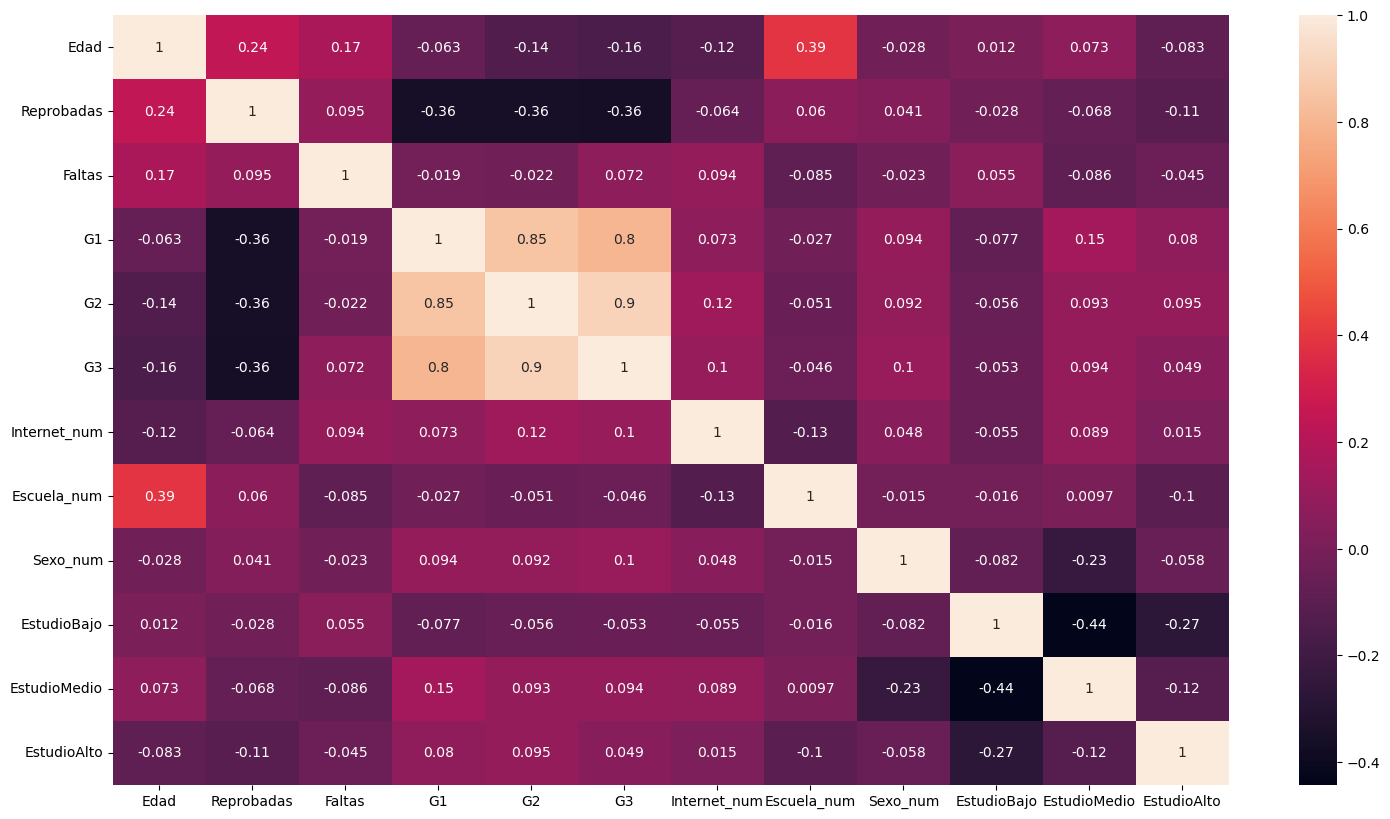

In [308]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

En el mapa anterior podemos observar que las variables con más correlación son G1, G2, y G3. G3 es nuestra variable dependiente, por lo tanto buscamos variables que tengan una alta correlación con esta, pero entre G1 y G2 existe una correlación de 0.85, lo cual podría indicar colinealidad entre ambas variables. Además sabemos que la calificación del segundo parcial (representada por G2) es un mejor indicador para determinar la calificación que un alumno sacará al final que el primer parcial, ya que la calificación del último parcial tiende a ser más similar a la del segundo que a la del primero. Para asegurar el mejor modelo, podemos eliminar una de las dos, de preferencia la que tenga una menor correlación con la variable dependiente. En este caso, se eliminará la variable G1, ya que se parece mucho a G2 y además tiene una correlación ligeramente menor con la variable dependiente.

In [312]:
df.drop('G1', axis=1, inplace=True)
df.head(5)

,Edad,Reprobadas,Faltas,G2,G3,Internet_num,Escuela_num,Sexo_num,EstudioBajo,EstudioMedio,EstudioAlto
0,18,0,6,6,6,0,0,0,1,0,0
1,17,0,4,5,6,1,0,0,1,0,0
2,15,3,10,8,10,1,0,0,1,0,0
3,15,0,2,14,15,1,0,0,0,1,0
4,16,0,4,10,10,0,0,0,1,0,0


5. Incluye términos de interacción para al menos dos pares de variables, las que te llame 
más la atención analizar con esta metodología. Trata de evitar incluir interacciones par 
todos los pares de variables posibles. Imprime en consola las primeras 5 observacion s
de la base de datos con los nuevos términos.

In [337]:
x = df[['Edad', 'Reprobadas', 'Faltas', 'G2', 'Internet_num', 'Escuela_num', 'Sexo_num', 'EstudioBajo', 'EstudioMedio', 'EstudioAlto']]
y = df['G3']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
poly=PolynomialFeatures(interaction_only=True,include_bias=False).fit(x_train)
x_train_I=pd.DataFrame(poly.transform(x_train),columns=poly.get_feature_names_out(x_train.columns))
print(x_train_I.head())

   Edad  Reprobadas  Faltas    G2  Internet_num  Escuela_num  Sexo_num  \
0  18.0         1.0    12.0  12.0           1.0          0.0       0.0   
1  15.0         0.0     0.0  15.0           1.0          0.0       0.0   
2  15.0         0.0     0.0  18.0           1.0          0.0       1.0   
3  17.0         0.0     2.0   9.0           1.0          0.0       1.0   
4  15.0         0.0     0.0   0.0           1.0          0.0       0.0   

   EstudioBajo  EstudioMedio  EstudioAlto  ...  Escuela_num Sexo_num  \
0          1.0           0.0          0.0  ...                   0.0   
1          1.0           0.0          0.0  ...                   0.0   
2          1.0           0.0          0.0  ...                   0.0   
3          1.0           0.0          0.0  ...                   0.0   
4          0.0           1.0          0.0  ...                   0.0   

   Escuela_num EstudioBajo  Escuela_num EstudioMedio  Escuela_num EstudioAlto  \
0                      0.0               

6. Entrena un modelo de regresión lineal múltiple en un subconjunto de datos que 
corresponda al 80% de los datos totales e imprime en consola un resumen de lo 
resultados obtenidos. Posteriormente, usando dicho modelo, predice la calificación fin l
del 20% de las observaciones que no se usaron para entrenar. Genera una gráfica de
dispersión de las calificaciones finales reales contra las calificaciones finales estim das
por el modelo en los datos de prueba. Agrega una línea de texto donde de  una
conclusión sobre los resultados del modelo, con base en la información que se m estra
en la gráfica.

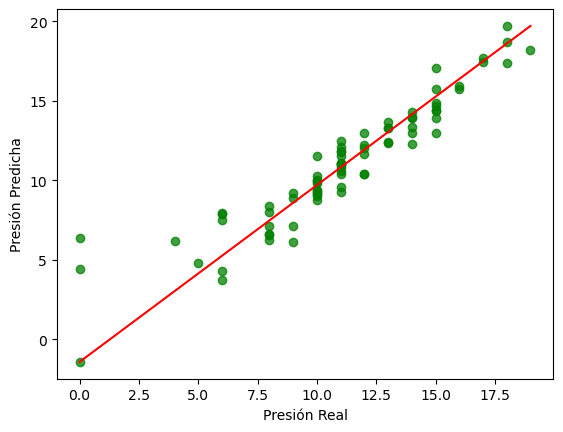

In [340]:
#Modelo con solo las variables seleccionadas
model = sm.OLS(y_train, sm.add_constant(x_train))
results = model.fit()
#PRedicciones de los datos de Test
y_PredTest = results.predict(sm.add_constant(x_test))
xgraph = y_test
ygraph = y_PredTest
plt.scatter(xgraph, ygraph, color='g', alpha=0.75)
plt.xlabel('Presión Real')
plt.ylabel('Presión Predicha')
plt.plot([min(xgraph), max(xgraph)], [min(ygraph), max(ygraph)], color='red')
plt.show()

Gracias a la gráfica podemos observar que las predicciones del modelo debería ser bastante cercanas a los datos reales, puesto que los puntos se encuentran muy cerca de la línea de 45°, indicando que las predicciones se encuentran muy cerca de los datos reales.

### *Doy mi palabra de que he realizado esta actividad con integridad académica.*